In [1]:
#using DataFrames
using Random, Distributions, Statistics, Plots, DifferentialEquations

First generate R:

In [2]:
using Combinatorics
R_lookup = collect(Combinatorics.permutations([1, 0, -1], 3))
R = rand(R_lookup)

3-element Vector{Int64}:
  0
  1
 -1

In [3]:
p = repeat([1/6], 6)

6-element Vector{Float64}:
 0.16666666666666666
 0.16666666666666666
 0.16666666666666666
 0.16666666666666666
 0.16666666666666666
 0.16666666666666666

In [4]:
Δₜ = 1 / 1000
time_vec = (1:1000) / 1000;

In [5]:
fn(θ, p, t) = θ * cos(t)
problem = ODEProblem(fn, 1.0, (0, time_vec[end]))
θ = solve(problem, saveat = time_vec)
θ = getfield(θ, :u);

In [6]:
W₁ = [0.0]
W₂ = [0.0]
W₃ = [0.0]

append!(W₁, rand(Normal(0, Δₜ ^ .5), length(time_vec) - 1))
append!(W₂, rand(Normal(0, Δₜ ^ .5), length(time_vec) - 1))
append!(W₃, rand(Normal(0, Δₜ ^ .5), length(time_vec) - 1))

W₁ = cumsum(W₁)
W₂ = cumsum(W₂)
W₃ = cumsum(W₃)


X₁ = θ + W₁
X₂ = θ + W₂
X₃ = θ + W₃;

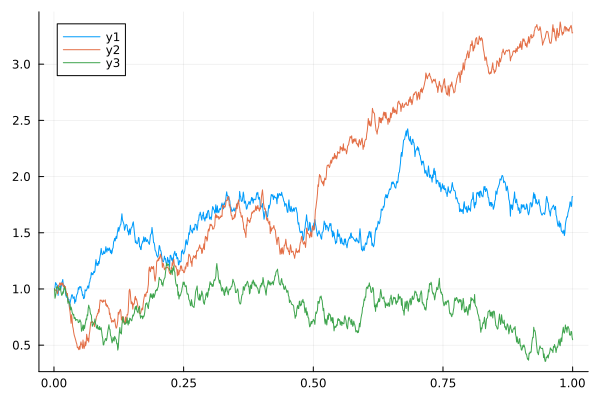

In [7]:
plot(time_vec, [X₁, X₂, X₃])

In [8]:
Y₁ = X₁ + R[1] * time_vec
Y₂ = X₂ + R[2] * time_vec
Y₃ = X₃ + R[3] * time_vec;

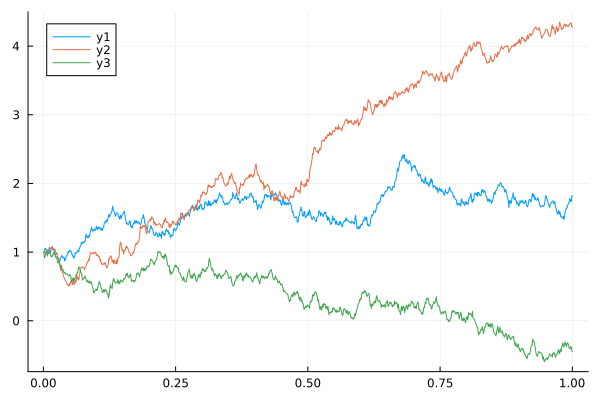

In [9]:
plot(time_vec, [Y₁, Y₂, Y₃])

In [10]:
π_list = [p]
W = [[0.0, 0.0, 0.0]]
dY₁ = diff(Y₁)
dY₂ = diff(Y₂)
dY₃ = diff(Y₃)

for t in eachindex(time_vec)[1:(end-1)]
    push!(W, W[end] + [dY₁[t], dY₂[t], dY₃[t]] - R * time_vec[t] *  Δₜ)
    current_matrix = hcat([
        R_lookup[z] * time_vec[t] - sum(hcat([π_list[end][k] * (R_lookup[k] * time_vec[t]) for k in 1:6]...), dims = 2)
        for z in eachindex(R_lookup)
    ]...)'
    push!(π_list, π_list[end] + (π_list[end] .* current_matrix) * (W[end] - W[end - 1]))
end # end for

In [18]:
sum(hcat([π_list[end][k] * (R_lookup[k] * time_vec[1]) for k in 1:6]...), dims = 2)

3×1 Matrix{Float64}:
 -0.0001477235529583927
  0.000807487478538112
 -0.0006597639255797193

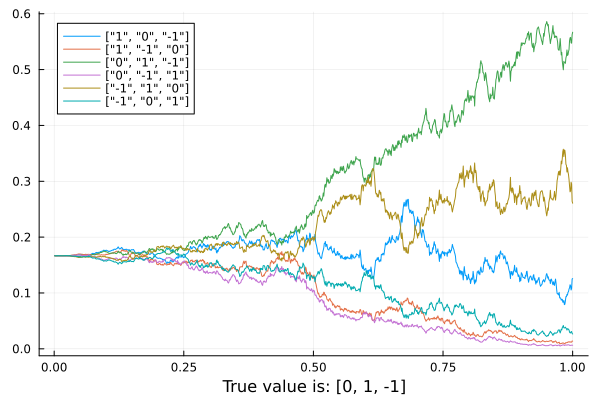

In [11]:
plot(time_vec, hcat(π_list...)', labels = hcat(R_lookup...))
xlabel!("True value is: $R")

In [12]:
R_lookup

6-element Vector{Vector{Int64}}:
 [1, 0, -1]
 [1, -1, 0]
 [0, 1, -1]
 [0, -1, 1]
 [-1, 1, 0]
 [-1, 0, 1]

In [13]:
π_list_2 = [[π_list[t][3] + π_list[t][4], π_list[t][1] + π_list[t][6], π_list[t][2] + π_list[t][5]] for t in eachindex(time_vec)]
θ_est = [sum([Y₁[t], Y₂[t], Y₃[t]] .* π_list_2[t]) / sum(π_list_2[t]) for t in eachindex(time_vec)];

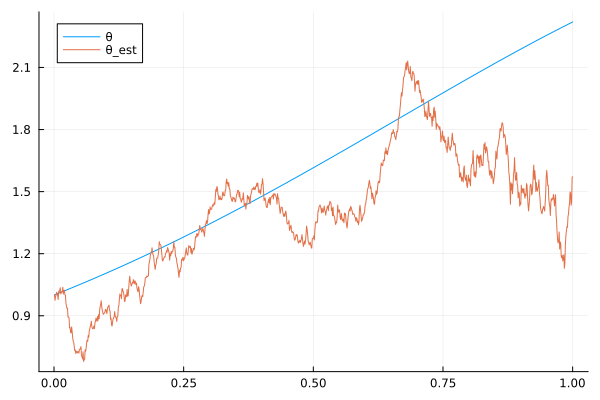

In [14]:
plot(time_vec, [θ θ_est], labels = ["θ" "θ_est"])